In [1]:
import keras
from keras import layers
from keras import regularizers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [2]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [3]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 4s 9ms/step - loss: 0.2849 - val_loss: 0.1997
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1801 - val_loss: 0.1628
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1536 - val_loss: 0.1435
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1388 - val_loss: 0.1322
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1286 - val_loss: 0.1226
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1208 - val_loss: 0.1165
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1158 - val_loss: 0.1125
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1124 - val_loss: 0.1098
Epoch 9/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1101 - val_loss: 0.1079
Epoch 10/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1086 - val_lo

In [8]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


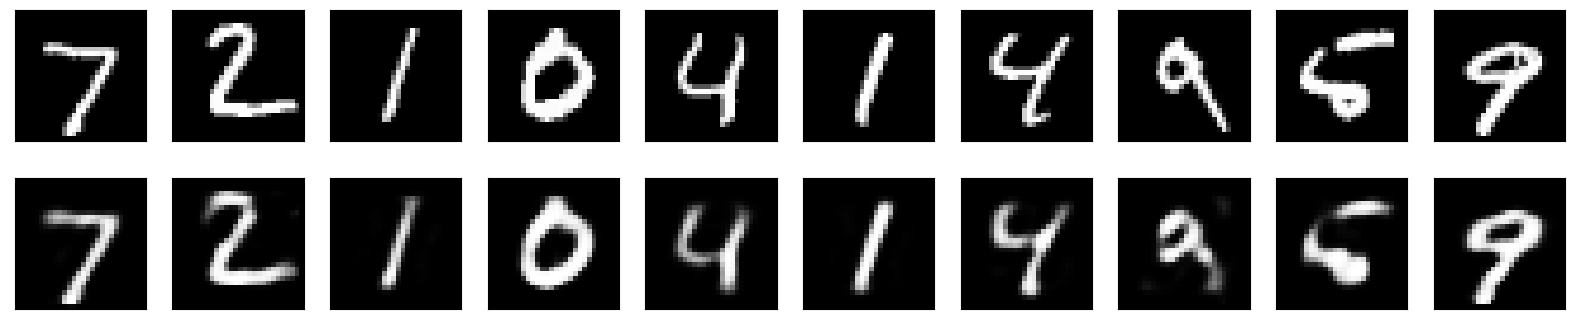

In [9]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()